# Individual Analysis for the X-Ray Spectra Experiment

Use this template to carry out the analysis tasks for the experiment.  You may need to consult the documentation for different Python packages.  Also recommended: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

We will also be using [**LMFit**](https://lmfit.github.io/lmfit-py/) for curve fitting 
and the [Uncertainties](https://pythonhosted.org/uncertainties/) package for calculating statistical uncertainty. 

In [1]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Summary of tasks

### Prior to working on this notebook

1. Obtain a copy of the AmpTek software **DppMCA** from the link on the course website.  Note: it works only on Windows or inside a Windows environment (Students with Macs have had success this way.)  Each member of the group should try to do this.

2. Download the data files with the .mca extension from the experiment page.  Start with the iron (Fe-26) data file.  Open the background (1500s) data file and then open the Fe-26 data file and compare them.  Note the large peaks above background for the iron sample.  Use the procedure described in class to set the ROI and obtain the peak position and width.  Record this data into a spreadsheet.

3. Repeat this process for all of the other known samples: find the peaks notably above background and obtain their positions and widths.  It is best to move up and down in <i>Z</i> from Fe, so that you can see how similar peaks shift as <i>Z</i> is changed.

4. Because of the large data set, the group should divide up the files, but make sure there are some that overlap, so you can check your technique by comparing results from different people.

5. Once you have analyzed the peaks from all of the "knowns" and have your procedure down, repeat for the 6 "unknowns." Pay close attention to what the peak pattern looks like, and how it might compare to similar peaks among the "knowns."

6. Finally, put the results into two .csv files, one for "knowns," one for "unknowns."  These will be read into the notebook.

### Tasks for this notebook

* Make a "Moseley plot" of the knowns: $\sqrt{\rm Ch\;\#}$ vs. $Z$.

* Determine the $\text{K}_\alpha$ series and the $\text{L}_\alpha$ series.  Fit lines to these to determine the screening constants $\sigma$.

* Make initial guesses for the $Z$ values of the unknowns, and plot the peaks for these samples in the Moseley plot.  Then adjust $Z$ if needed until the unknown peaks fit the pattern of the known peaks as well as can be seen.  This completes "Method 1" for the unknowns.

* Select the peaks corresponding to the $\text{K}_{\alpha1}$ series and look up the known energies of these peaks.  Then plot and fit $E_{\text{K}_{\alpha1}}$ versus $\text{Ch #}$, and obtain constants to create a calibration line that converts channel number to energy in eV or keV.

* Apply the calibration to the unknown peaks and look up the energies in the look-up table to match with the correct $Z$ values.  This completes "Method 2" for the unknowns.

## Read in the "Known" sample peak locations

CSV file has columns <b>Element</b>, <b>Z</b>, <b>Ka1</b>, <b>Ka2</b>, <b>Kb</b>, <b>La</b>, <b>Lb</b>, <b>Lg</b> for K-lines $\alpha1,\alpha2$, $\beta$, and L-lines $\alpha$, $\beta$, and $\gamma$.  Each row is a different element.  Cells that do not have peaks are set to zero.

In [2]:
Xray_known = pd.read_csv('X_rays_data_known.CSV')
Xray_known

,Elements,Z,Ka1,Ka1_w,Ka1_E,Ka2,Ka2_w,Ka2_E,Kb,Kb_w,Kb_E,La,La_w,La_E,Lb,Lb_w,Lb_E,Lg,Lg_w,Lg_E
0,Cl,17,318.37,19.27,2.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.00,0.00
1,Ti,22,539.69,24.26,4.51,0.00,0.00,0.00,591.20,23.03,4.93,0.00,0.00,0.45,0.00,0.0000,0.00,0.00,0.00,0.00
2,Cr,24,645.84,25.32,5.41,0.00,0.00,0.00,706.14,18.35,5.43,0.00,0.00,0.57,0.00,0.0000,0.00,0.00,0.00,0.00
3,Fe,26,761.82,27.34,6.40,0.00,0.00,0.00,838.74,25.65,7.06,0.00,0.00,0.70,0.00,0.0000,0.00,0.00,0.00,0.00
4,Ni,28,888.28,27.20,7.48,0.00,0.00,0.00,981.03,26.04,8.26,0.00,0.00,0.85,0.00,0.0000,0.00,0.00,0.00,0.00
5,Cu,29,954.96,28.43,8.05,0.00,0.00,0.00,1055.89,26.52,8.90,0.00,0.00,0.93,0.00,0.0000,0.00,0.00,0.00,0.00
6,Zn,30,1023.96,28.49,8.64,0.00,0.00,0.00,1134.47,27.60,9.57,0.00,0.00,1.01,0.00,0.0000,0.00,0.00,0.00,0.00
7,Ag,47,2601.93,41.16,22.16,2468.15,37.64,20.73,2933.42,28.82,24.94,366.71,37.16,2.98,0.00,0.0000,0.00,0.00,0.00,0.00
8,Cd,48,2719.50,42.19,23.17,2586.35,44.62,21.73,3068.09,29.10,26.09,380.26,36.99,3.13,0.00,0.0000,0.00,0.00,0.00,0.00
9,Sn,50,2963.35,26.79,25.27,2811.01,42.22,23.61,3346.84,35.12,28.48,417.03,19.00,3.44,445.41,6.1186,3.74,0.00,0.00,0.00


### Combine peak locations and widths into uncertainty-object arrays

You do not need to include peak widths, but it does not hurt.  It is a little extra work.

In [3]:
Xray_known['K_alpha1'] = up.uarray(Xray_known['Ka1'], Xray_known['Ka1_w'])
Xray_known['K_alpha2'] = up.uarray(Xray_known['Ka2'], Xray_known['Ka2_w'])
Xray_known['K_beta'] = up.uarray(Xray_known['Kb'], Xray_known['Kb_w'])
Xray_known['L_alpha'] = up.uarray(Xray_known['La'], Xray_known['La_w'])
Xray_known['L_beta'] = up.uarray(Xray_known['Lb'], Xray_known['Lb_w'])
Xray_known['L_gamma'] = up.uarray(Xray_known['Lg'], Xray_known['Lg_w'])
Xray_known[['K_alpha1', 'K_alpha2', 'K_beta', 'L_alpha', 'L_beta', 'L_gamma']]

,K_alpha1,K_alpha2,K_beta,L_alpha,L_beta,L_gamma
0,318+/-19,0.0+/-0,0.0+/-0,0.0+/-0,0.0+/-0,0.0+/-0
1,540+/-24,0.0+/-0,591+/-23,0.0+/-0,0.0+/-0,0.0+/-0
2,646+/-25,0.0+/-0,706+/-18,0.0+/-0,0.0+/-0,0.0+/-0
3,762+/-27,0.0+/-0,839+/-26,0.0+/-0,0.0+/-0,0.0+/-0
4,888+/-27,0.0+/-0,981+/-26,0.0+/-0,0.0+/-0,0.0+/-0
5,955+/-28,0.0+/-0,1056+/-27,0.0+/-0,0.0+/-0,0.0+/-0
6,1024+/-28,0.0+/-0,1134+/-28,0.0+/-0,0.0+/-0,0.0+/-0
7,(2.60+/-0.04)e+03,(2.47+/-0.04)e+03,2933+/-29,(3.7+/-0.4)e+02,0.0+/-0,0.0+/-0
8,(2.72+/-0.04)e+03,(2.59+/-0.04)e+03,3068+/-29,(3.8+/-0.4)e+02,0.0+/-0,0.0+/-0
9,2963+/-27,(2.81+/-0.04)e+03,3347+/-35,417+/-19,445+/-6,0.0+/-0


## Make a Moseley Plot

Transform the data sets by taking the square root of the peak locations.  Plot $\sqrt{\text{Ch #}}$ versus $Z$.

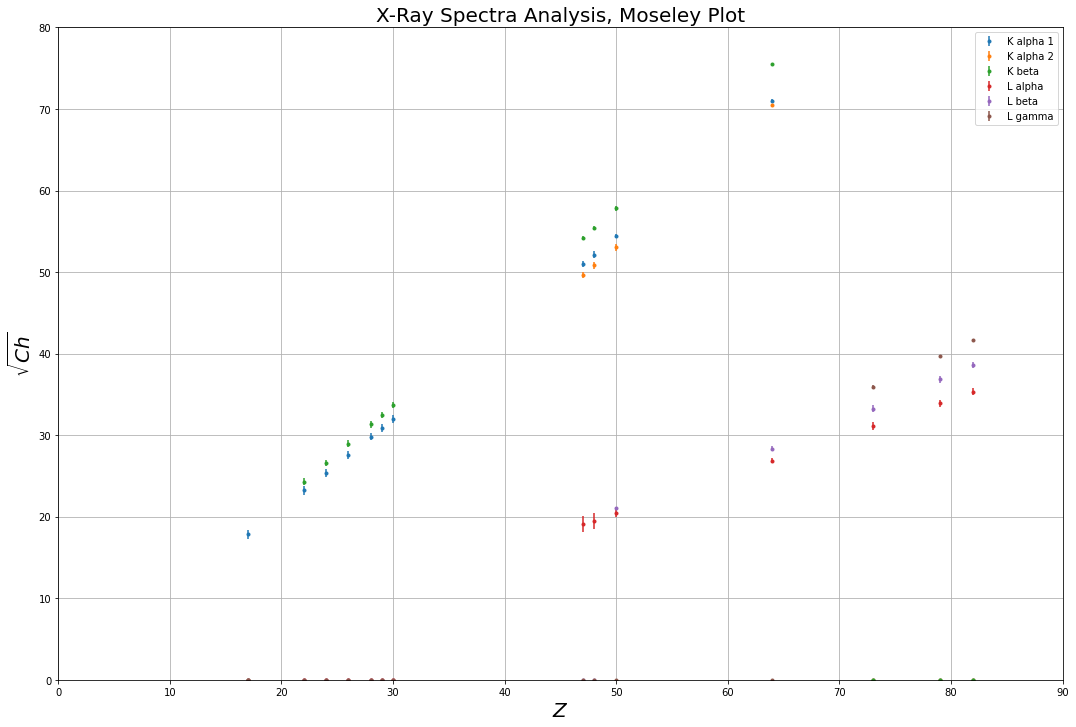

In [4]:
plt.figure(figsize=(18,12))
plt.grid()
plt.title('X-Ray Spectra Analysis, Moseley Plot',fontsize=20)
plt.ylabel(r'$\sqrt{Ch}$',fontsize=20)
plt.xlabel(r'$Z$',fontsize=20)
plt.xlim(0,90)
plt.ylim(0,80)

plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['K_alpha1'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['K_alpha1'])),label='K alpha 1');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['K_alpha2'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['K_alpha2'])),label='K alpha 2');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['K_beta'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['K_beta'])),label='K beta');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['L_alpha'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['L_alpha'])),label='L alpha');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['L_beta'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['L_beta'])),label='L beta');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['L_gamma'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['L_gamma'])),label='L gamma');

plt.legend()


## Fit to obtain screening constants

Fit the $K_{\alpha1}$ and $L_{\alpha}$ series to a line to obtain the screening constants $\sigma_K$ and $\sigma_L$.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 0.00351893
    reduced chi-square = 7.0379e-04
    Akaike info crit   = -49.1685522
    Bayesian info crit = -49.2767319
[[Variables]]
    slope:      1.08992045 +/- 0.00237418 (0.22%) (init = 1.08992)
    intercept: -0.71879225 +/- 0.06052996 (8.42%) (init = -0.7187923)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.986

Slope =  1.0899+/-0.0024

Intercept =  -0.72+/-0.06


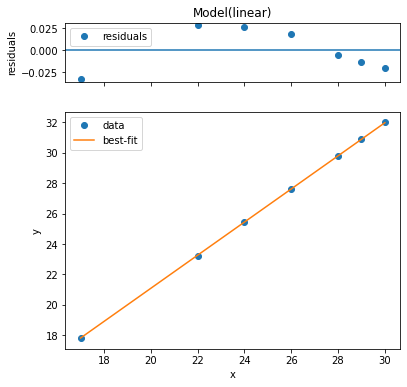

In [5]:
from lmfit.models import LinearModel

#Create a function that return two arrays in the order of the array feeds in. 
#The function eliminates all zeroes in the second array, and eliminates
# corresponding elements in the first array, then return these two process arraies.

def reject_zeros(xdata, ydata):
    x = np.array([])
    y = np.array([])
    for i in range(len(ydata)):
        if ydata[i] == 0:
            pass
        else:
            x = np.append(x, [xdata[i]])
            y = np.append(y, [ydata[i]])
    return [x,y, unc]

# NOTE: only fitting a certain range of Z. More discussion in the "option setion" in the very end

K_alpha1 = reject_zeros(Xray_known['Z'], up.nominal_values(up.sqrt(Xray_known['K_alpha1'])))
xdata = K_alpha1[0]
ydata = K_alpha1[1]

xdata = xdata[:7]
ydata = ydata[:7]

line = LinearModel()
param_guess = line.guess(ydata, x=xdata)
line_fit = line.fit(ydata, param_guess, x=xdata)
print(line_fit.fit_report())
K_alpha1_slop = unc.ufloat(line_fit.params['slope'].value, line_fit.params['slope'].stderr)
K_alpha1_inter = unc.ufloat(line_fit.params['intercept'].value, line_fit.params['intercept'].stderr)
print('\nSlope = ', K_alpha1_slop)
print('\nIntercept = ', K_alpha1_inter)
line_fit.plot();

xfit_K = np.linspace(0,90)
yfit_K = line_fit.eval(line_fit.params, x=xfit_K)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 6
    # variables        = 2
    chi-square         = 0.00328187
    reduced chi-square = 8.2047e-04
    Akaike info crit   = -41.0666045
    Bayesian info crit = -41.4830856
[[Variables]]
    slope:      0.46539696 +/- 8.8062e-04 (0.19%) (init = 0.465397)
    intercept: -2.85738922 +/- 0.05928557 (2.07%) (init = -2.857389)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.980

Slope =  0.4654+/-0.0009

Intercept =  -2.86+/-0.06


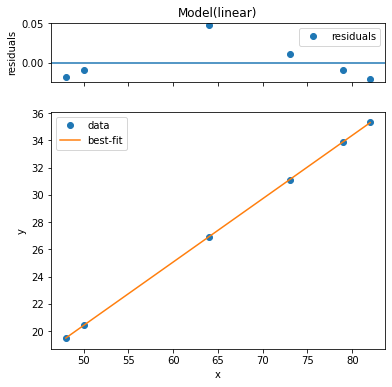

In [6]:
L_alpha = reject_zeros(Xray_known['Z'], up.nominal_values(up.sqrt(Xray_known['L_alpha'])))
xdata = L_alpha[0]
ydata = L_alpha[1]

xdata = xdata[1:]
ydata = ydata[1:]

line = LinearModel()
param_guess = line.guess(ydata, x=xdata)
line_fit = line.fit(ydata, param_guess, x=xdata)
print(line_fit.fit_report())
L_alpha_slop = unc.ufloat(line_fit.params['slope'].value, line_fit.params['slope'].stderr)
L_alpha_inter = unc.ufloat(line_fit.params['intercept'].value, line_fit.params['intercept'].stderr)
print('\nSlope = ',L_alpha_slop)
print('\nIntercept = ', L_alpha_inter)
line_fit.plot();

xfit_L = np.linspace(0,90)
yfit_L = line_fit.eval(line_fit.params, x=xfit_L)

### Results of fit

In [7]:
sigma_K = -K_alpha1_inter / K_alpha1_slop
sigma_L = -L_alpha_inter / L_alpha_slop

print('Screening constant for K-alpha1 = {:.2uP}'.format(sigma_K))
print('Screening constant for L-alpha = {:.2uP}'.format(sigma_L))

Screening constant for K-alpha1 = 0.659±0.056
Screening constant for L-alpha = 6.14±0.13


## Replot with fitlines

Calculate fitlines for the two linear fits, and plot them with the data in the Moseley plot. 

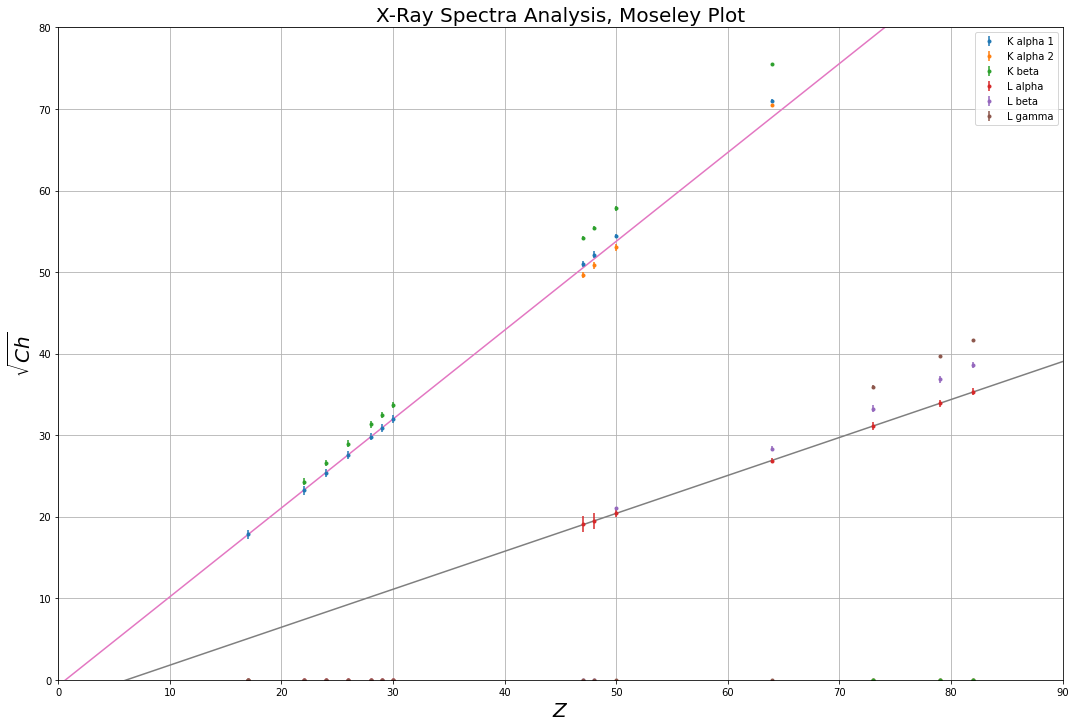

In [8]:
plt.figure(figsize=(18,12))
plt.grid()
plt.title('X-Ray Spectra Analysis, Moseley Plot',fontsize=20)
plt.ylabel(r'$\sqrt{Ch}$',fontsize=20)
plt.xlabel(r'$Z$',fontsize=20)
plt.xlim(0,90)
plt.ylim(0,80)

plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['K_alpha1'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['K_alpha1'])),label='K alpha 1');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['K_alpha2'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['K_alpha2'])),label='K alpha 2');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['K_beta'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['K_beta'])),label='K beta');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['L_alpha'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['L_alpha'])),label='L alpha');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['L_beta'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['L_beta'])),label='L beta');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['L_gamma'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['L_gamma'])),label='L gamma');
plt.plot(xfit_K, yfit_K)
plt.plot(xfit_L, yfit_L)

plt.legend()

## Read in the "Unknown" peaks

Read the results from the peak fitting for the "unknown" samples.  

My CSV file has columns **U1, U2, U3, U4, U5, U6** for the peaks for each unknown.  Number of peaks in each is between 2 and 4.  Empty cells are set to zero.

In [9]:
Xray_unknown = pd.read_csv('X_rays_data_unknown.CSV')
Xray_unknown['unknown1'] = up.uarray(Xray_unknown['U1'], Xray_unknown['U1_w'])
Xray_unknown['unknown2'] = up.uarray(Xray_unknown['U2'], Xray_unknown['U2_w'])
Xray_unknown['unknown3'] = up.uarray(Xray_unknown['U3'], Xray_unknown['U3_w'])
Xray_unknown['unknown4'] = up.uarray(Xray_unknown['U4'], Xray_unknown['U4_w'])
Xray_unknown['unknown5'] = up.uarray(Xray_unknown['U5'], Xray_unknown['U5_w'])
Xray_unknown['unknown6'] = up.uarray(Xray_unknown['U6'], Xray_unknown['U6_w'])
Xray_unknown.loc[:, 'peaks':'U6_w']


,peaks,U1,U1_w,U2,U2_w,U3,U3_w,U4,U4_w,U5,U5_w,U6,U6_w
0,Ka1,646.52,25.79,888.38,27.61,1169.99,28.00,2055.93,31.9100,2841.32,47.13,0.00,0.00
1,Ka2,0.00,0.00,0.00,0.00,0.00,0.00,1945.83,12.4527,2698.03,25.99,0.00,0.00
2,Kb,709.18,23.77,980.71,26.15,1301.21,23.59,2309.24,14.5300,3206.56,26.00,0.00,0.00
3,La,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,396.12,16.87,996.87,27.78
4,Lb,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,1153.72,34.07


## Plot the Unknowns with the Knowns

Add the peaks for the unknowns in the same manner as was done for the knowns.  You will need to estimate the value of $Z$ for each unknown and then refine it.

For the unknowns, a number of peaks will have the same $Z$ value.  To create an x-axis list of $Z$ values for each of the unknowns, here is one way:

    np.full(4,24) 
    
will make a numpy array of 4 elements all having the same value of 24 ($Z$).

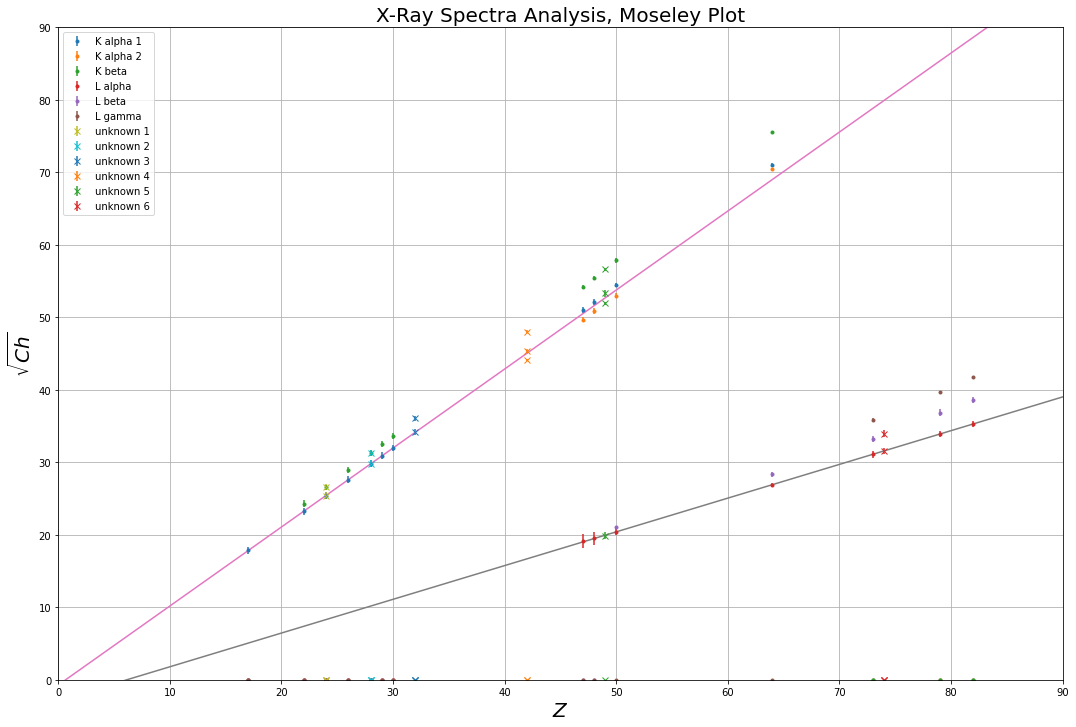

In [10]:
plt.figure(figsize=(18,12))
plt.grid()
plt.title('X-Ray Spectra Analysis, Moseley Plot',fontsize=20)
plt.ylabel(r'$\sqrt{Ch}$',fontsize=20)
plt.xlabel(r'$Z$',fontsize=20)
plt.xlim(0,90)
plt.ylim(0,90)

# Plot the knowns
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['K_alpha1'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['K_alpha1'])),label='K alpha 1');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['K_alpha2'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['K_alpha2'])),label='K alpha 2');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['K_beta'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['K_beta'])),label='K beta');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['L_alpha'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['L_alpha'])),label='L alpha');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['L_beta'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['L_beta'])),label='L beta');
plt.errorbar(Xray_known['Z'],up.nominal_values(up.sqrt(Xray_known['L_gamma'])),fmt='.',
             yerr=up.std_devs(up.sqrt(Xray_known['L_gamma'])),label='L gamma');
plt.plot(xfit_K, yfit_K)
plt.plot(xfit_L, yfit_L)


# Plot the unknowns
# First estimate Z values using Moseley's law and the calculate sigma_K value: 24, 28, 32, 42, 49, 30
plt.errorbar(np.full(5,24),up.nominal_values(up.sqrt(Xray_unknown['unknown1'])),fmt='x',
             yerr=up.std_devs(up.sqrt(Xray_unknown['unknown1'])),label='unknown 1');
plt.errorbar(np.full(5,28),up.nominal_values(up.sqrt(Xray_unknown['unknown2'])),fmt='x',
             yerr=up.std_devs(up.sqrt(Xray_unknown['unknown2'])),label='unknown 2');
plt.errorbar(np.full(5,32),up.nominal_values(up.sqrt(Xray_unknown['unknown3'])),fmt='x',
             yerr=up.std_devs(up.sqrt(Xray_unknown['unknown3'])),label='unknown 3');
plt.errorbar(np.full(5,42),up.nominal_values(up.sqrt(Xray_unknown['unknown4'])),fmt='x',
             yerr=up.std_devs(up.sqrt(Xray_unknown['unknown4'])),label='unknown 4');
plt.errorbar(np.full(5,49),up.nominal_values(up.sqrt(Xray_unknown['unknown5'])),fmt='x',
             yerr=up.std_devs(up.sqrt(Xray_unknown['unknown5'])),label='unknown 5');
plt.errorbar(np.full(5,74),up.nominal_values(up.sqrt(Xray_unknown['unknown6'])),fmt='x',
             yerr=up.std_devs(up.sqrt(Xray_unknown['unknown6'])),label='unknown 6');

plt.legend()

## Include the known energies

Look up the known energies of the known $K_{\alpha1}$ (and $L_{\alpha}$) peaks (in keV) and add a column to the known's dataframe.  This will make it easy to fit.

In [11]:
## Energy is already included                               

In [12]:
print('Collected Known data. Energy column in keV.')
# Print your dataframe with the energies
# Energies in columns K alpha 2 and L gamma lines are estimates
Xray_known.loc[:, 'Elements':'Lg_E']

Collected Known data. Energy column in keV.


,Elements,Z,Ka1,Ka1_w,Ka1_E,Ka2,Ka2_w,Ka2_E,Kb,Kb_w,Kb_E,La,La_w,La_E,Lb,Lb_w,Lb_E,Lg,Lg_w,Lg_E
0,Cl,17,318.37,19.27,2.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.00,0.00
1,Ti,22,539.69,24.26,4.51,0.00,0.00,0.00,591.20,23.03,4.93,0.00,0.00,0.45,0.00,0.0000,0.00,0.00,0.00,0.00
2,Cr,24,645.84,25.32,5.41,0.00,0.00,0.00,706.14,18.35,5.43,0.00,0.00,0.57,0.00,0.0000,0.00,0.00,0.00,0.00
3,Fe,26,761.82,27.34,6.40,0.00,0.00,0.00,838.74,25.65,7.06,0.00,0.00,0.70,0.00,0.0000,0.00,0.00,0.00,0.00
4,Ni,28,888.28,27.20,7.48,0.00,0.00,0.00,981.03,26.04,8.26,0.00,0.00,0.85,0.00,0.0000,0.00,0.00,0.00,0.00
5,Cu,29,954.96,28.43,8.05,0.00,0.00,0.00,1055.89,26.52,8.90,0.00,0.00,0.93,0.00,0.0000,0.00,0.00,0.00,0.00
6,Zn,30,1023.96,28.49,8.64,0.00,0.00,0.00,1134.47,27.60,9.57,0.00,0.00,1.01,0.00,0.0000,0.00,0.00,0.00,0.00
7,Ag,47,2601.93,41.16,22.16,2468.15,37.64,20.73,2933.42,28.82,24.94,366.71,37.16,2.98,0.00,0.0000,0.00,0.00,0.00,0.00
8,Cd,48,2719.50,42.19,23.17,2586.35,44.62,21.73,3068.09,29.10,26.09,380.26,36.99,3.13,0.00,0.0000,0.00,0.00,0.00,0.00
9,Sn,50,2963.35,26.79,25.27,2811.01,42.22,23.61,3346.84,35.12,28.48,417.03,19.00,3.44,445.41,6.1186,3.74,0.00,0.00,0.00


## Fit a line

Fit a line to the known energy vs. measured peak locations.  IMPORTANT: This is NOT a Moseley plot, just the un-transformed peak measurements.

[ 318.37  539.69  645.84  761.82  888.28  954.96 1023.96 2601.93 2719.5
 2963.35 5046.88] [ 2.62  4.51  5.41  6.4   7.48  8.05  8.64 22.16 23.17 25.27 42.98]
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 11
    # variables        = 2
    chi-square         = 0.00658358
    reduced chi-square = 7.3151e-04
    Akaike info crit   = -77.6317906
    Bayesian info crit = -76.8360000
[[Variables]]
    slope:      0.00854539 +/- 5.8244e-06 (0.07%) (init = 0.008545386)
    intercept: -0.09972408 +/- 0.01273138 (12.77%) (init = -0.09972408)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.768

Slope =  0.008545+/-0.000006

Intercept =  -0.100+/-0.013


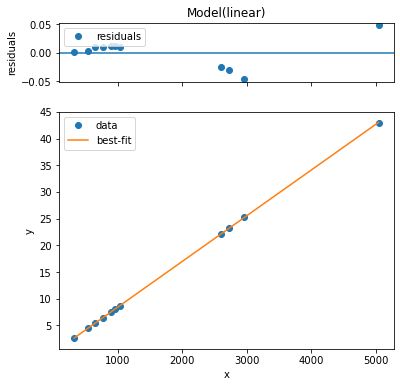

In [13]:
K_alpha1_E = reject_zeros(Xray_known['Ka1_E'], up.nominal_values(Xray_known['K_alpha1']))
xdata = K_alpha1_E[1]
ydata = K_alpha1_E[0]

print(xdata, ydata)

line = LinearModel()
param_guess = line.guess(ydata, x=xdata)
line_fit = line.fit(ydata, param_guess, x=xdata)
print(line_fit.fit_report())
K_alpha1_E_slop = unc.ufloat(line_fit.params['slope'].value, line_fit.params['slope'].stderr)
K_alpha1_E_inter = unc.ufloat(line_fit.params['intercept'].value, line_fit.params['intercept'].stderr)
print('\nSlope = ', K_alpha1_E_slop)
print('\nIntercept = ', K_alpha1_E_inter)
line_fit.plot();

xfit_K = np.linspace(0,90)
yfit_K = line_fit.eval(line_fit.params, x=xfit_K)

## Make calibration function

Use the fit results to create a simple function to transform peak locations into energies in keV.

In [14]:
def find_E(ch):
    E = (K_alpha1_E_slop * ch) + K_alpha1_E_inter
    return E

def find_Ch(E):
    Ch = (E - K_alpha1_E_inter)/K_alpha1_E_slop
    return Ch

print(find_Ch(6.93), find_Ch(7.65))

822.6+/-1.6 906.9+/-1.6


Test it against the known $K_{\alpha1}$ and $L_{\alpha}$ lines.  Easiest way: make a table wth adjacent columns.

In [15]:
Energies = Xray_known[['Elements', 'Z', 'Ka1', 'Ka1_E', 'La', 'La_E']].copy()
Energies['Ka1_E_cal'] = find_E(Energies['Ka1'])
Energies['La_E_cal'] = find_E(Energies['La'])

Energies

,Elements,Z,Ka1,Ka1_E,La,La_E,Ka1_E_cal,La_E_cal
0,Cl,17,318.37,2.62,0.00,0.00,2.621+/-0.013,-0.100+/-0.013
1,Ti,22,539.69,4.51,0.00,0.45,4.512+/-0.013,-0.100+/-0.013
2,Cr,24,645.84,5.41,0.00,0.57,5.419+/-0.013,-0.100+/-0.013
3,Fe,26,761.82,6.40,0.00,0.70,6.410+/-0.013,-0.100+/-0.013
4,Ni,28,888.28,7.48,0.00,0.85,7.491+/-0.014,-0.100+/-0.013
5,Cu,29,954.96,8.05,0.00,0.93,8.061+/-0.014,-0.100+/-0.013
6,Zn,30,1023.96,8.64,0.00,1.01,8.650+/-0.014,-0.100+/-0.013
7,Ag,47,2601.93,22.16,366.71,2.98,22.135+/-0.020,3.034+/-0.013
8,Cd,48,2719.50,23.17,380.26,3.13,23.139+/-0.020,3.150+/-0.013
9,Sn,50,2963.35,25.27,417.03,3.44,25.223+/-0.021,3.464+/-0.013


## Apply to Unknowns

Apply the calibration to the unknowns, and compare to what you find in the look-up table for the assumed value of Z.

Useful to make a table containing the measured energies next to the the known energies.

In [16]:
#Create a list of measured energies for each element in the order: K alpha 1, K alpha 2, K beta, L alpha, L beta
E1_cal = find_E(up.nominal_values(Xray_unknown['unknown1']))
E2_cal = find_E(up.nominal_values(Xray_unknown['unknown2']))
E3_cal = find_E(up.nominal_values(Xray_unknown['unknown3']))
E4_cal = find_E(up.nominal_values(Xray_unknown['unknown4']))
E5_cal = find_E(up.nominal_values(Xray_unknown['unknown5']))
E6_cal = find_E(up.nominal_values(Xray_unknown['unknown6']))





unknown_E = pd.DataFrame({'Z':[24, 28, 32, 42, 49, 74],
                          'Elements': ['Cr', 'Ni', 'Ge', 'Mo', 'In', 'W'],
                          'Ka_E': [5.41, 7.48, 9.89, 17.48, 24.21, 59.31],
                          'Ka1_E_cal':[E1_cal[0], E2_cal[0], E3_cal[0], E4_cal[0], E5_cal[0], E6_cal[0]],
                          'Ka2_E_cal':[E1_cal[1], E2_cal[1], E3_cal[1], E4_cal[1], E5_cal[1], E6_cal[1]],
                          'Kb_E':[5.43, 8.26, 10.98, 19.61, 27.27, 67.23],
                          'Kb_E_cal':[E1_cal[2], E2_cal[2], E3_cal[2], E4_cal[2], E5_cal[2], E6_cal[2]],
                          'La_E':[0.57, 0.85, 1.19, 2.29, 3.29, 8.40],
                          'La_E_cal':[E1_cal[3], E2_cal[3], E3_cal[3], E4_cal[3], E5_cal[3], E6_cal[3]],
                          'Lb_E':[0.58, 4.87, 1.21, 2.40, 3.49, 9.67],
                          'Lb_E_cal':[E1_cal[4], E2_cal[4], E3_cal[4], E4_cal[4], E5_cal[4], E6_cal[4]]
                         })

unknown_E

,Z,Elements,Ka_E,Ka1_E_cal,Ka2_E_cal,Kb_E,Kb_E_cal,La_E,La_E_cal,Lb_E,Lb_E_cal
0,24,Cr,5.41,5.425+/-0.013,-0.100+/-0.013,5.43,5.960+/-0.013,0.57,-0.100+/-0.013,0.58,-0.100+/-0.013
1,28,Ni,7.48,7.492+/-0.014,-0.100+/-0.013,8.26,8.281+/-0.014,0.85,-0.100+/-0.013,4.87,-0.100+/-0.013
2,32,Ge,9.89,9.898+/-0.014,-0.100+/-0.013,10.98,11.020+/-0.015,1.19,-0.100+/-0.013,1.21,-0.100+/-0.013
3,42,Mo,17.48,17.469+/-0.017,16.528+/-0.017,19.61,19.634+/-0.019,2.29,-0.100+/-0.013,2.40,-0.100+/-0.013
4,49,In,24.21,24.180+/-0.021,22.956+/-0.020,27.27,27.302+/-0.023,3.29,3.285+/-0.013,3.49,-0.100+/-0.013
5,74,W,59.31,-0.100+/-0.013,-0.100+/-0.013,67.23,-0.100+/-0.013,8.40,8.419+/-0.014,9.67,9.759+/-0.014


## Optional: Fit Look-up Data

To test the model for finding the screening constant, I will retry the fit using the "official" energies from the look-up tables.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 1.5573e-05
    reduced chi-square = 3.1146e-06
    Akaike info crit   = -87.1111416
    Bayesian info crit = -87.2193213
[[Variables]]
    slope:      0.10163861 +/- 1.5794e-04 (0.16%) (init = 0.1016386)
    intercept: -0.11124510 +/- 0.00402673 (3.62%) (init = -0.1112451)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.986

Slope =  0.10164+/-0.00016

Intercept =  -0.111+/-0.004


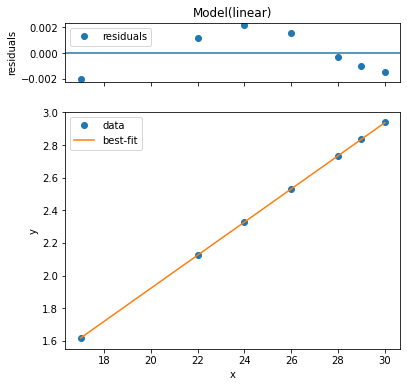

In [17]:
# NOTE: I have found that taking only the lower Z values from the K_alpha line and higher value Z from the L_alpha line give the best fit result
# according the the screening constant provided on Wikipedia page (i.e. for sigma_K_alpha = 1, sigma_L_alpha = 7.4).
# So I will onyl fit part of the data in the following sections


xdata = Xray_known['Z'][:7]
ydata = up.nominal_values(up.sqrt(Xray_known['Ka1_E']))[:7]

line = LinearModel()
param_guess = line.guess(ydata, x=xdata)
line_fit = line.fit(ydata, param_guess, x=xdata)
print(line_fit.fit_report())
K_alpha1_slop = unc.ufloat(line_fit.params['slope'].value, line_fit.params['slope'].stderr)
K_alpha1_inter = unc.ufloat(line_fit.params['intercept'].value, line_fit.params['intercept'].stderr)
print('\nSlope = ', K_alpha1_slop)
print('\nIntercept = ', K_alpha1_inter)
line_fit.plot();

xfit_K = np.linspace(0,90)
yfit_K = line_fit.eval(line_fit.params, x=xfit_K)
sigma_K_lookup = -K_alpha1_inter / K_alpha1_slop

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 6
    # variables        = 2
    chi-square         = 8.1659e-06
    reduced chi-square = 2.0415e-06
    Akaike info crit   = -77.0437883
    Bayesian info crit = -77.4602694
[[Variables]]
    slope:      0.04349514 +/- 4.3927e-05 (0.10%) (init = 0.04349514)
    intercept: -0.31991327 +/- 0.00295727 (0.92%) (init = -0.3199133)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.980

Slope =  0.04350+/-0.00004

Intercept =  -0.3199+/-0.0030


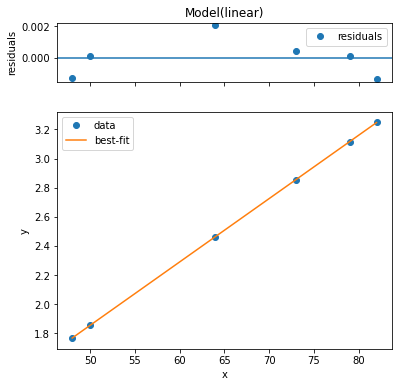

In [18]:
L_alpha_E = reject_zeros(Xray_known['Z'], up.sqrt(Xray_known['La_E']))
xdata = L_alpha_E[0]
ydata = L_alpha_E[1]

xdata = xdata[7:]
ydata = ydata[7:]

line = LinearModel()
param_guess = line.guess(ydata, x=xdata)
line_fit = line.fit(ydata, param_guess, x=xdata)
print(line_fit.fit_report())
L_alpha_slop = unc.ufloat(line_fit.params['slope'].value, line_fit.params['slope'].stderr)
L_alpha_inter = unc.ufloat(line_fit.params['intercept'].value, line_fit.params['intercept'].stderr)
print('\nSlope = ',L_alpha_slop)
print('\nIntercept = ', L_alpha_inter)
line_fit.plot();

xfit_L = np.linspace(0,90)
yfit_L = line_fit.eval(line_fit.params, x=xfit_L)
sigma_L_lookup = -L_alpha_inter / L_alpha_slop

In [19]:
print('Froom look-up table data:')
print('Screening constant for K-alpha1 = {:.2uP}'.format(sigma_K_lookup))
print('Screening constant for L-alpha = {:.2uP}'.format(sigma_L_lookup))

Froom look-up table data:
Screening constant for K-alpha1 = 1.095±0.040
Screening constant for L-alpha = 7.355±0.068


In [22]:
find_Ch(122)

14288.380062845987+/-9.852085814707673